In [1]:
%matplotlib inline

import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv("..//Random_Samples//airbnb_prices.csv")
df.head(50)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...
5,5790170,1476,29968916,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,184,4.5,2,1.0,NaN,102.0,NaN,Beautiful apartment,2017-07-23 13:06:19.663975,52.342265,4.897126,0101000020E6100000B090B932A896134060C8EA56CF2B...
6,934060,1476,5037506,Shared room,NaN,Amsterdam,NaN,Oostelijk Havengebied / Indische Buurt,67,5.0,16,1.0,NaN,462.0,NaN,"LOTUS, Classic Dutch Saling Barge",2017-07-23 13:06:09.988016,52.377552,4.930418,0101000020E61000005D70067FBFB813400B45BA9F5330...
7,19590049,1476,132687356,Shared room,NaN,Amsterdam,NaN,Westerpark,2,0.0,2,1.0,NaN,414.0,NaN,big boot Adam 04,2017-07-23 13:06:09.984748,52.375205,4.866117,0101000020E6100000DD09F65FE7761340D925AAB70630...
8,5020280,1476,4059485,Shared room,NaN,Amsterdam,NaN,Oud Oost,2,0.0,2,1.0,NaN,222.0,NaN,Bright modern appartment in East!,2017-07-23 13:06:07.452609,52.357346,4.912887,0101000020E610000032C687D9CBA613409FAD8383BD2D...
9,15810783,1476,84978218,Shared room,NaN,Amsterdam,NaN,Centrum West,0,0.0,12,1.0,NaN,301.0,NaN,"CANAL BOATTOUR AMSTERDAM covered boat 1,5 hour",2017-07-23 13:06:07.447989,52.386610,4.890128,0101000020E6100000FB03E5B67D8F13403D27BD6F7C31...


In [4]:
df.drop(['country', 'borough', 'bathrooms', 'minstay'], axis=1, inplace=True)
df = df[df.room_type != 'Shared room']

In [5]:
df.shape

(18660, 16)

In [6]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'city', 'neighborhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'name', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [7]:
df.dtypes

room_id                   int64
survey_id                 int64
host_id                   int64
room_type                object
city                     object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
name                     object
last_modified            object
latitude                float64
longitude               float64
location                 object
dtype: object

In [8]:
df.describe()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1.866000e+04,18660.0,1.866000e+04,18660.000000,18660.000000,18660.000000,18660.000000,18660.000000,18660.000000,18660.000000
mean,1.120262e+07,1476.0,3.575860e+07,16.729207,3.303778,2.921543,1.431833,166.811897,52.365261,4.888606
std,6.084245e+06,0.0,3.758082e+07,33.506653,2.213003,1.319141,0.880145,108.961385,0.015141,0.034530
min,2.818000e+03,1476.0,2.234000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264
25%,6.047014e+06,1476.0,7.125411e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355252,4.864372
50%,1.228306e+07,1476.0,1.987107e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364623,4.885995
75%,1.661017e+07,1476.0,5.201818e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374789,4.907502
max,2.000373e+07,1476.0,1.418319e+08,532.000000,5.000000,17.000000,10.000000,6000.000000,52.424980,5.027689


In [9]:
#Brief Insight of listing

print("Number of properties:")
print(len(df["room_id"]))

print("")
print("Number of unique host:")
print(len(df["host_id"].unique()))


print("")
print("Number of Room Type:")
print(len(df["room_type"].unique()))


print("")
print("Number of Borough:")
print(len(df["neighborhood"].unique()))


print("")
print("Average Price for All Amsterdam:")
print(round(df.price.mean(),2))


print("")
print("Maximum Price for All Amsterdam:")
print(round(df.price.max(),2))


print("")
print("Minimum Price for All Amsterdam:")
print(round(df.price.min(),2))


print("")
print("Number of 0 (Zero) Price:")
print(len(df[df["price"]==0]))

print("")
print("Average Number of Revies for All Amsterdam:")
print(round(df.reviews.mean(),2))

Number of properties:
18660

Number of unique host:
15904

Number of Room Type:
2

Number of Borough:
23

Average Price for All Amsterdam:
166.81

Maximum Price for All Amsterdam:
6000.0

Minimum Price for All Amsterdam:
12.0

Number of 0 (Zero) Price:
0

Average Number of Revies for All Amsterdam:
16.73


In [10]:

#Deleting rows that number of reviews is equal zero

df = df[(df["reviews"]>0)]
len(df)

15685

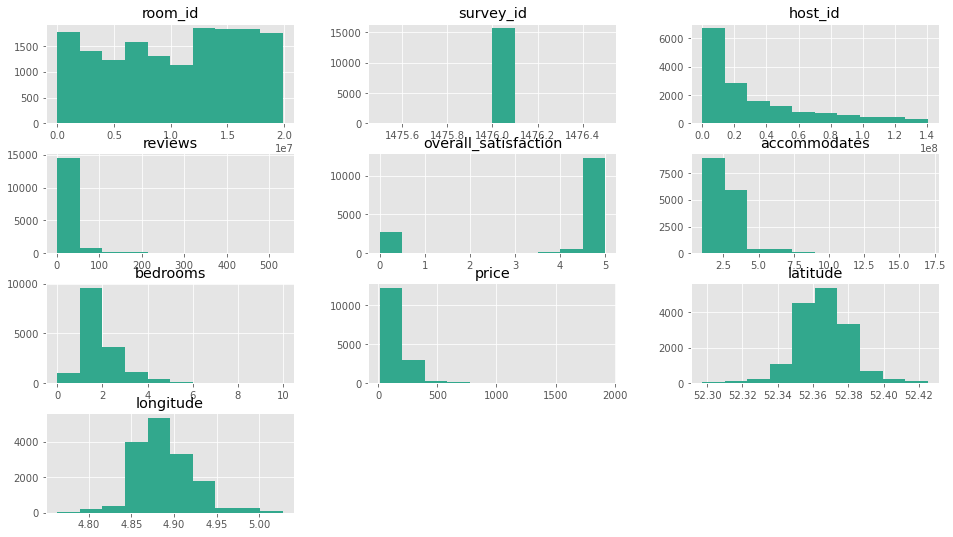

In [25]:
df.hist(figsize = (16,9), color='#32a88d')
plt.show()

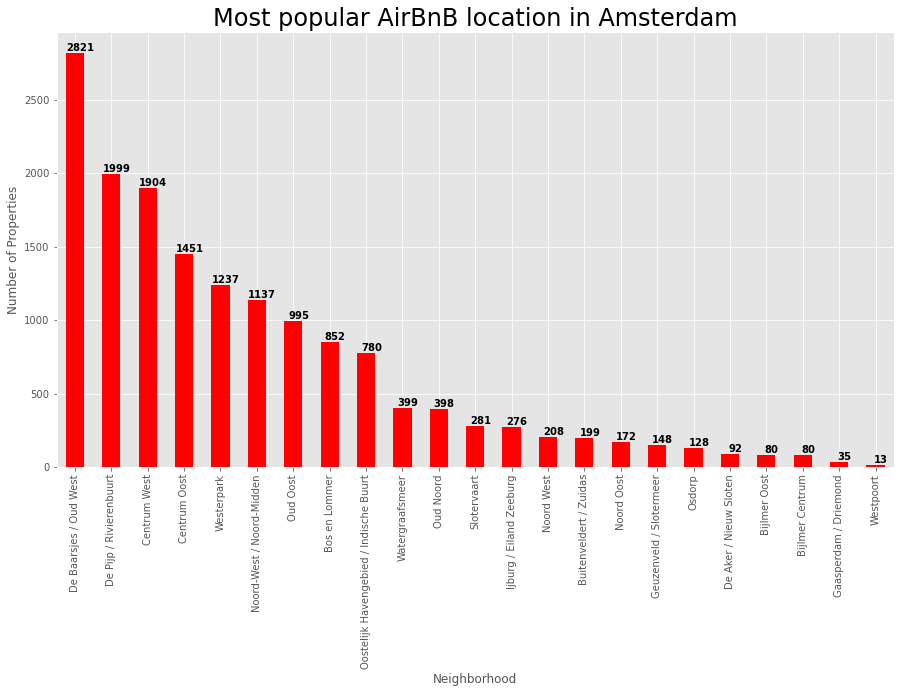

In [11]:
nb = df.value_counts('neighborhood')

n = nb.plot(kind='bar',figsize=(15,8), color='#ff0000')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Properties')
plt.title('Most popular AirBnB location in Amsterdam', fontsize=24)
for p in n.patches:
        n.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')
plt.show()

#1 = De Baarsjes

In [12]:
bc = df.groupby("neighborhood").survey_id.count().sort_values(ascending=False)
bc = bc.reset_index()
bc.rename(columns={"survey_id":"count"}, inplace=True)
bc["percentage"]=round(bc["count"]/bc["count"].sum()*100,2)
bc

,neighborhood,count,percentage
0,De Baarsjes / Oud West,2821,17.99
1,De Pijp / Rivierenbuurt,1999,12.74
2,Centrum West,1904,12.14
3,Centrum Oost,1451,9.25
4,Westerpark,1237,7.89
5,Noord-West / Noord-Midden,1137,7.25
6,Oud Oost,995,6.34
7,Bos en Lommer,852,5.43
8,Oostelijk Havengebied / Indische Buurt,780,4.97
9,Watergraafsmeer,399,2.54


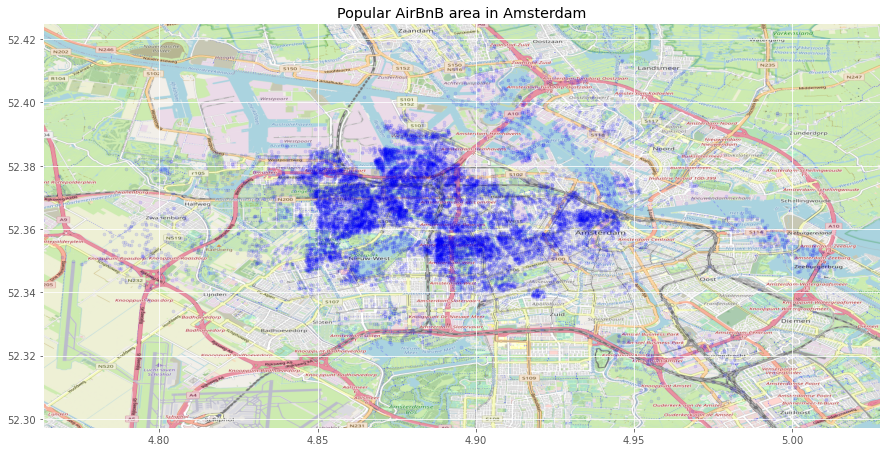

In [13]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

BBox = (df.longitude.min(), df.longitude.max(),
         df.latitude.min(), df.latitude.max())

ruh_m = plt.imread("..//Random_Samples//map.png")

fig, ax = plt.subplots(figsize = (15,9))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.1, c='b', s=10)
ax.set_title('Popular AirBnB area in Amsterdam')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

#West side of Amsterdam is the most popular area to stay at AirBnB

/Users/chuck_saenborisut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


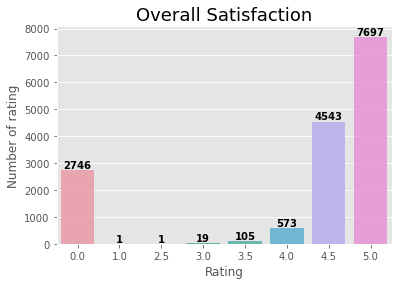

In [14]:
happiness = df.value_counts('overall_satisfaction')
plt.figure(figsize=(6,4))
ax = sns.barplot(happiness.index, happiness.values, alpha=0.8)
plt.title('Overall Satisfaction', fontsize=18)
plt.ylabel('Number of rating', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')
plt.show();

In [15]:
bos = df.groupby("neighborhood").overall_satisfaction.sum().sort_values(ascending=False)
bos = bos.reset_index()
bos["percentage"] = round(bos["overall_satisfaction"] / bos["overall_satisfaction"].sum()*100,2)
bos

,neighborhood,overall_satisfaction,percentage
0,De Baarsjes / Oud West,11125.0,18.05
1,Centrum West,7779.0,12.62
2,De Pijp / Rivierenbuurt,7761.5,12.59
3,Centrum Oost,5905.0,9.58
4,Westerpark,5015.0,8.13
5,Noord-West / Noord-Midden,4319.5,7.01
6,Oud Oost,3893.0,6.31
7,Bos en Lommer,3374.5,5.47
8,Oostelijk Havengebied / Indische Buurt,3095.0,5.02
9,Oud Noord,1546.5,2.51


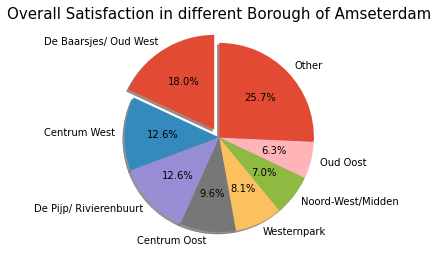

In [16]:
labels = 'De Baarsjes/ Oud West', 'Centrum West', 'De Pijp/ Rivierenbuurt', 'Centrum Oost', 'Westernpark', 'Noord-West/Midden', 'Oud Oost','Other'
sizes = [18.05, 12.62, 12.59, 9.58, 8.13, 7.01, 6.31, 25.71]
explode = (0.1,0,0,0,0,0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Overall Satisfaction in different Borough of Amseterdam', fontsize=15)

plt.show()

In [17]:
df.groupby('neighborhood').mean()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
neighborhood,,,,,,,,,,
Bijlmer Centrum,1.331746e+07,1476.0,5.080675e+07,19.387500,3.718750,2.850000,1.187500,93.687500,52.318250,4.951010
Bijlmer Oost,1.328228e+07,1476.0,5.517130e+07,18.275000,3.706250,3.137500,1.337500,100.150000,52.320714,4.974258
Bos en Lommer,1.067905e+07,1476.0,3.337206e+07,18.076291,3.960681,2.661972,1.274648,125.237089,52.378497,4.852012
Buitenveldert / Zuidas,1.206105e+07,1476.0,4.266066e+07,14.100503,3.512563,2.944724,1.562814,136.180905,52.330892,4.873278
Centrum Oost,1.007075e+07,1476.0,3.180641e+07,25.628532,4.069607,2.909028,1.363198,195.525844,52.365954,4.903316
Centrum West,1.004517e+07,1476.0,3.552135e+07,27.265756,4.085609,2.891807,1.261555,205.629202,52.375841,4.886850
De Aker / Nieuw Sloten,1.167743e+07,1476.0,5.111171e+07,34.000000,3.934783,2.880435,1.391304,130.913043,52.346325,4.797857
De Baarsjes / Oud West,1.000078e+07,1476.0,2.952352e+07,18.640199,3.943637,2.753988,1.363346,157.665012,52.366099,4.862902
De Pijp / Rivierenbuurt,1.036187e+07,1476.0,3.155550e+07,17.701851,3.882691,2.804902,1.343672,166.242621,52.351358,4.897410


In [18]:
av = df.groupby('neighborhood').mean()['price'].sum()/23
av

142.48632712297152

In [19]:
br = df.groupby("neighborhood").price.mean().sort_values(ascending=False)
br = br.reset_index()
br

,neighborhood,price
0,Centrum West,205.629202
1,Centrum Oost,195.525844
2,Noord-West / Noord-Midden,178.321020
3,Ijburg / Eiland Zeeburg,176.340580
4,De Pijp / Rivierenbuurt,166.242621
5,De Baarsjes / Oud West,157.665012
6,Westerpark,157.050930
7,Oud Noord,155.954774
8,Watergraafsmeer,152.365915
9,Oud Oost,149.431156


/Users/chuck_saenborisut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


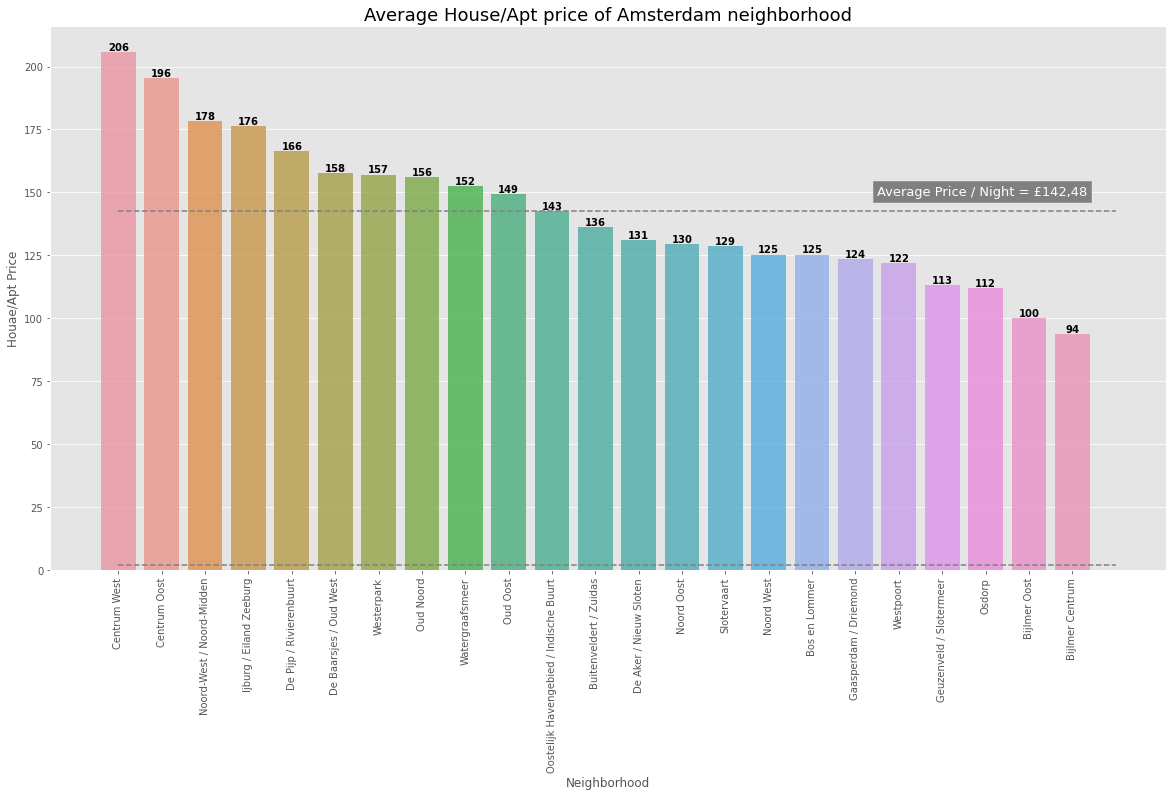

In [20]:
npp = df.groupby('neighborhood').mean()['price'].sort_values(ascending=False)
av = df.groupby('neighborhood').mean()['price'].sum()/23

plt.figure(figsize=(20,10))
ax = sns.barplot(npp.index, npp.values, alpha=0.8,)
plt.title('Average House/Apt price of Amsterdam neighborhood', fontsize=18)
plt.ylabel('Houae/Apt Price', fontsize=12)
plt.xlabel('Neighborhood', fontsize=12)
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

x_coordinates = [0,23]
y_median = [(av,2), (av,2)]
        
plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(17.5,149,'Average Price / Night = £142,48',fontsize = 13,backgroundcolor = 'gray',color = 'white')

plt.show();

In [21]:
ba = df.groupby('neighborhood').accommodates.sum().sort_values(ascending=False)
ba = ba.reset_index()
ba

,neighborhood,accommodates
0,De Baarsjes / Oud West,7769
1,De Pijp / Rivierenbuurt,5607
2,Centrum West,5506
3,Centrum Oost,4221
4,Noord-West / Noord-Midden,3426
5,Westerpark,3386
6,Oud Oost,2764
7,Bos en Lommer,2268
8,Oostelijk Havengebied / Indische Buurt,2254
9,Oud Noord,1401


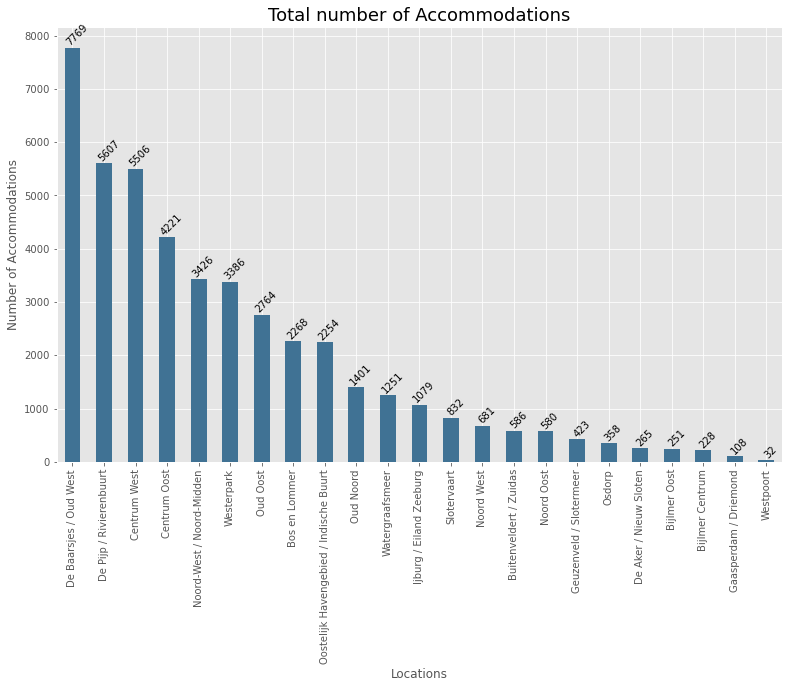

In [22]:
ba = df.groupby('neighborhood').accommodates.sum().sort_values(ascending=False)
ax = ba.plot(kind='bar',figsize=(13,8), color='#407294')
plt.xlabel('Locations')
plt.ylabel('Number of Accommodations')
plt.title('Total number of Accommodations', fontsize=18)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="normal", rotation=45,
                    color= 'black')
plt.show()

<AxesSubplot:xlabel='price'>

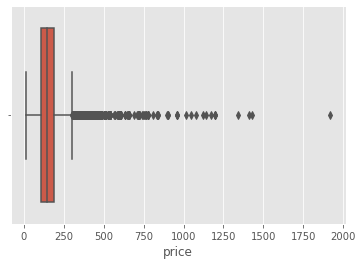

In [23]:
sns.boxplot(x=df['price'])

<AxesSubplot:>

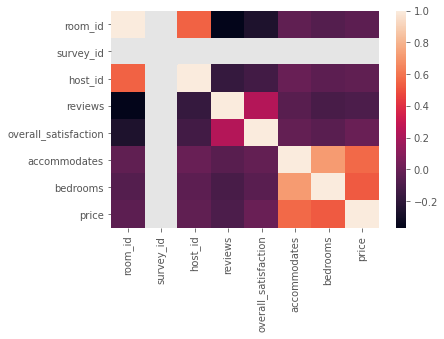

In [31]:
cor = df.drop(['latitude','longitude'], axis=1)
sns.heatmap(cor.corr())

(0.0, 2000.0)

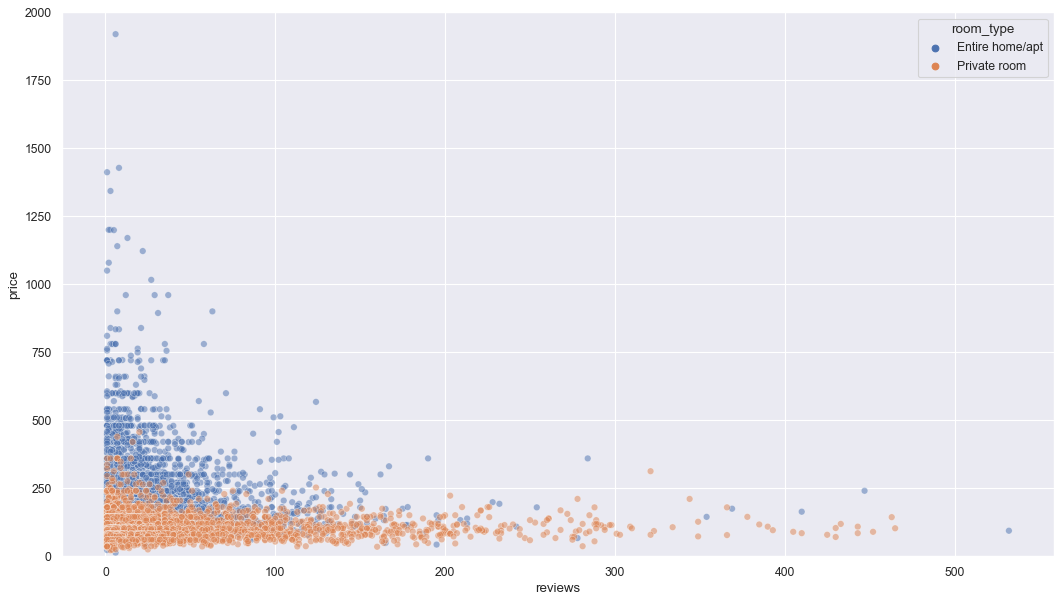

In [40]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
#cmap = sns.cubehelix_palette(as_cmap=True)
sns.scatterplot(x='reviews',y='price',data=df,alpha=0.5,\
                hue='room_type',\
                #palette=cmap,\
                legend="full")

plt.ylim(0, 2000)
#plt.xlim(-10, 400)

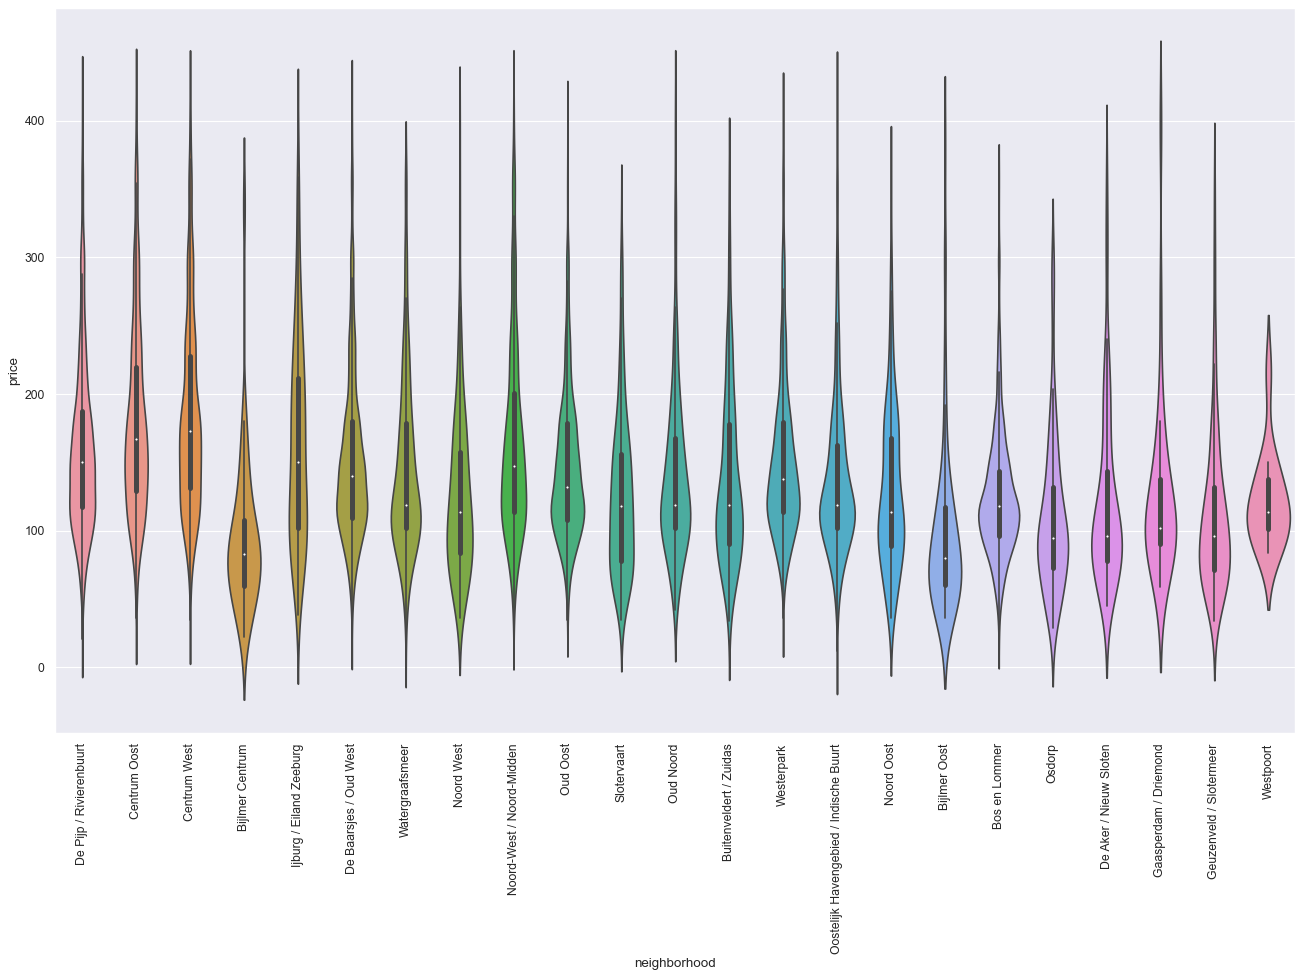

In [39]:
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(y='price',x='neighborhood',data=df[df.price < df['price'].quantile(.98)],)

plt.xticks(rotation=90)

plt.show()